In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\saran\\OneDrive\\Desktop\\Practice and Notes\\EDA_student_performance\\StudentsPerformance.csv")

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [15]:
# check info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
# check statstics of data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
# check missing value
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
df.shape

(1000, 8)

In [21]:
#check duplicates
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [22]:
# check no. of unique value in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [24]:
# numerical feature
[feature for feature in df.columns if df[feature].dtype!='O']

['math score', 'reading score', 'writing score']

In [26]:
# categorical feature
[feature for feature in df.columns if df[feature].dtype=='O']

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [28]:
df.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [32]:
df.gender.unique().__len__()

2

In [33]:
[feature for feature in df.columns if df[feature].dtype!='O']

['math score', 'reading score', 'writing score']

In [34]:
df["total_score"]=(df["math score"]+df["reading score"]+df["writing score"])
df["average"]=df["total_score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

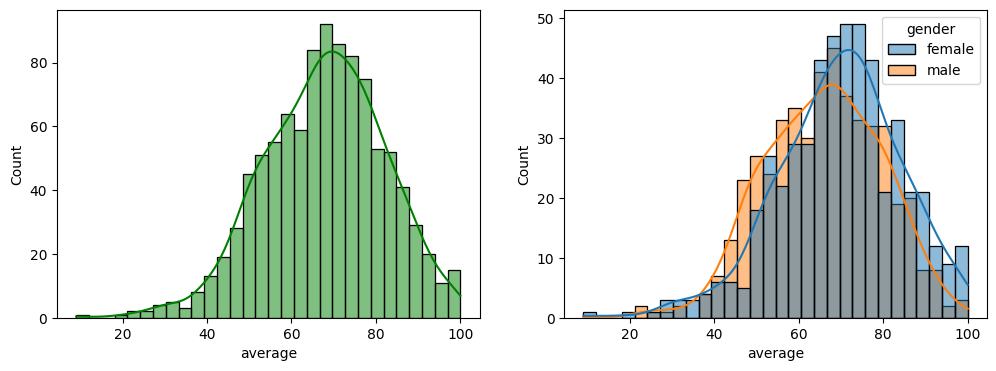

In [70]:
# exploring more visualisation
fig,axis=plt.subplots(1,2,figsize=(12,4)) 
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color="green")
plt.subplot(122)
sns.histplot(data=df,x="average",bins=30,kde=True,hue="gender")

<Axes: xlabel='average', ylabel='Count'>

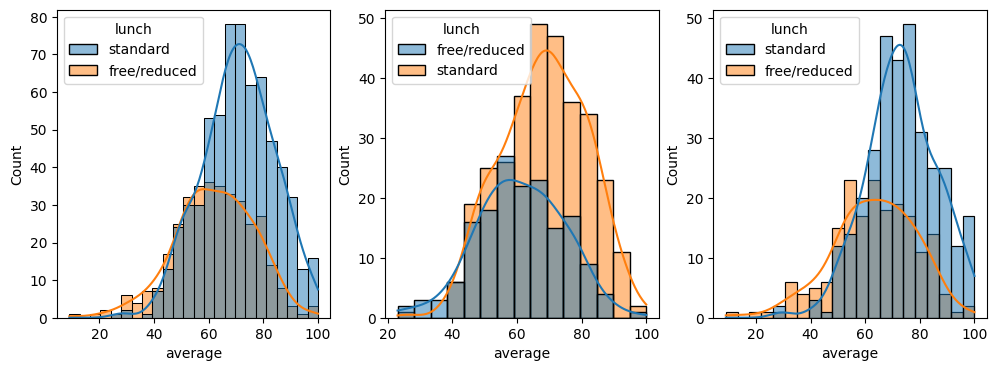

In [82]:
plt.subplots(1,3,figsize=(12,4)) 
plt.subplot(131)
sns.histplot(data=df,x="average",kde=True,hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="male"],x="average",kde=True,hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df["gender"]!="male"],x="average",kde=True,hue="lunch")

<Axes: xlabel='average', ylabel='Count'>

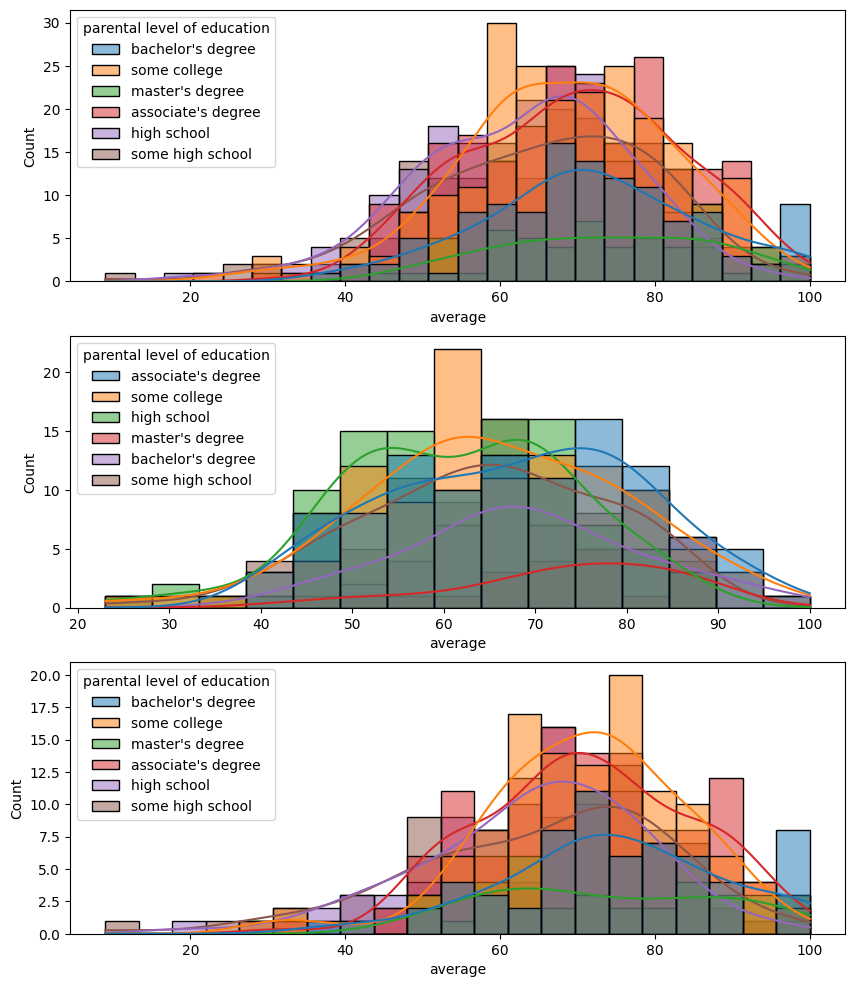

In [91]:
plt.subplots(3,1,figsize=(10,12)) 
plt.subplot(311)
sns.histplot(data=df,x="average",kde=True,hue="parental level of education")
plt.subplot(312)
sns.histplot(data=df[df["gender"]=="male"],x="average",kde=True,hue="parental level of education")
plt.subplot(313)
sns.histplot(data=df[df["gender"]!="male"],x="average",kde=True,hue="parental level of education")

<Axes: xlabel='average', ylabel='Density'>

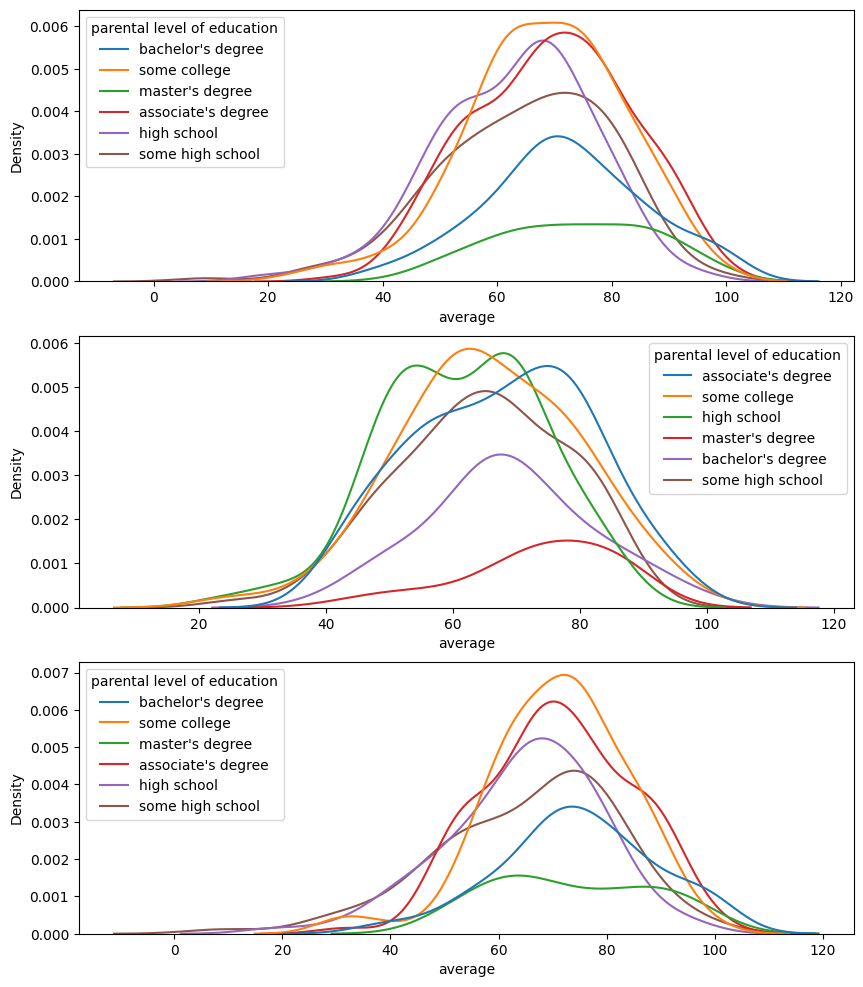

In [94]:
plt.subplots(3,1,figsize=(10,12)) 
plt.subplot(311)
sns.kdeplot(data=df,x="average",hue="parental level of education")
plt.subplot(312)
sns.kdeplot(data=df[df["gender"]=="male"],x="average",hue="parental level of education")
plt.subplot(313)
sns.kdeplot(data=df[df["gender"]!="male"],x="average",hue="parental level of education")

In [95]:
df1=df.groupby("parental level of education")

In [99]:
for i in df["parental level of education"].unique():
    print(i,df1.get_group(i).average.mean())

bachelor's degree 71.92372881355934
some college 68.47640117994099
master's degree 73.59887005649718
associate's degree 69.56906906906907
high school 63.0969387755102
some high school 65.10800744878958
